In [1]:
import oritelib as ori
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def seq_from_fasta_test(file_path):
    f=open(file_path, "r")

    all_lines = f.readlines()

    sequence = ''

    for i in range(1, len(all_lines)):
        sequence =  sequence + all_lines[i][0:len(all_lines[i])-1]

    return sequence

In [3]:
eco_fasta = seq_from_fasta_test("test_data/bordetella.fna")

In [4]:
eco_fasta = eco_fasta[1000000:] + eco_fasta[0:1000000]

In [5]:
eco_fasta[(len(eco_fasta)-6):]

'CTGGAG'

In [6]:
len(eco_fasta)+(2*52697)

4191583

In [7]:
len(eco_fasta)

4086189

In [8]:
eco_gb_plus, eco_gb_neg = ori.genbank_to_non_coding_intervals("test_data/bordetella.gbff")

In [21]:
eco_gb_neg

[(0, 20125),
 (20532, 24351),
 (25460, 27281),
 (28234, 28673),
 (29110, 29140),
 (30863, 31068),
 (31979, 35571),
 (36764, 45719),
 (45958, 53621),
 (54358, 54361),
 (54954, 54976),
 (56459, 56503),
 (57405, 57496),
 (58449, 59247),
 (60895, 61076),
 (62020, 62441),
 (63280, 63472),
 (64056, 64066),
 (64371, 64487),
 (65551, 65580),
 (66776, 67481),
 (68665, 73704),
 (74327, 74356),
 (74940, 75026),
 (76124, 77633),
 (78586, 79599),
 (81476, 82821),
 (84697, 84890),
 (86715, 86730),
 (87992, 88013),
 (89104, 89109),
 (91847, 94287),
 (94445, 94467),
 (96136, 104830),
 (105381, 105436),
 (107393, 107426),
 (108379, 110551),
 (111183, 111242),
 (111928, 111935),
 (113725, 116035),
 (117710, 117718),
 (119013, 119053),
 (120096, 120199),
 (121023, 121121),
 (122074, 123072),
 (123923, 124742),
 (125755, 128376),
 (130079, 130503),
 (131153, 133011),
 (133934, 135156),
 (136109, 136525),
 (138036, 143665),
 (145807, 145810),
 (146625, 147935),
 (148909, 150574),
 (152282, 152304),
 (15273

In [22]:
eco_gb_plus

[(3404, 3408),
 (4172, 4213),
 (5133, 6720),
 (7913, 8149),
 (8532, 8539),
 (9075, 9136),
 (10271, 10511),
 (11038, 11117),
 (11503, 11660),
 (20019, 20770),
 (21948, 26469),
 (27287, 32213),
 (33007, 33047),
 (34471, 34624),
 (35577, 37011),
 (42213, 42281),
 (42679, 42686),
 (43219, 43662),
 (44615, 45199),
 (45750, 46083),
 (46979, 48146),
 (50007, 50140),
 (51093, 51178),
 (52392, 69084),
 (70037, 70128),
 (70445, 71635),
 (73545, 76227),
 (77639, 91975),
 (94273, 96208),
 (98180, 99110),
 (99715, 99742),
 (100398, 100528),
 (101787, 101832),
 (102734, 102807),
 (103085, 103090),
 (103755, 103814),
 (104818, 109276),
 (110472, 113872),
 (114255, 114301),
 (114663, 114943),
 (115962, 127032),
 (128288, 131167),
 (132591, 132681),
 (132986, 138843),
 (142745, 142795),
 (143580, 149025),
 (149810, 152837),
 (153715, 159947),
 (160726, 160889),
 (161914, 162089),
 (164337, 169077),
 (170510, 170541),
 (171173, 171195),
 (172829, 172851),
 (173537, 174299),
 (175252, 176365),
 (176895, 

In [9]:
eco_gb_plus_lengths = []
index_of_long_nc = []

for i in range(len(eco_gb_plus)):
    lengths = eco_gb_plus[i][1] - eco_gb_plus[i][0]
    if lengths > 7000:
        index_of_long_nc.append(i)
    eco_gb_plus_lengths.append(lengths)

In [10]:
hist_vals, bin_boundaries = np.histogram(eco_gb_plus_lengths)

(array([1.172e+03, 1.570e+02, 7.100e+01, 3.700e+01, 1.800e+01, 6.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 5.000e+00]),
 array([2.00000e+00, 2.44570e+03, 4.88940e+03, 7.33310e+03, 9.77680e+03,
        1.22205e+04, 1.46642e+04, 1.71079e+04, 1.95516e+04, 2.19953e+04,
        2.44390e+04]),
 <a list of 10 Patch objects>)

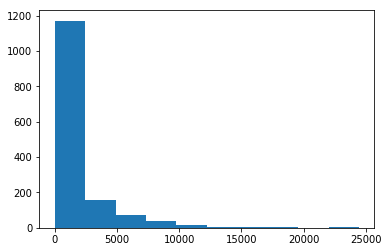

In [11]:
plt.hist(eco_gb_plus_lengths, bins = 10)

In [12]:
nc_pos_set = set()
nc_region_pos = []

for i in index_of_long_nc:
    start = eco_gb_plus[i][0]
    stop = eco_gb_plus[i][1] 
    index = list(range(start,stop+1))
    nc_region_pos.append(index)
    nc_pos_set.update(index)
    
all_nc_pos = list(nc_pos_set)
all_nc_pos.sort()

In [23]:
GC_val_eco, CGC_val_eco = ori.gc_skew_sliding_window(eco_fasta, window_rad = 250000)

seq len:  4086189
window_rad:  250000
extended seq length:  4586189


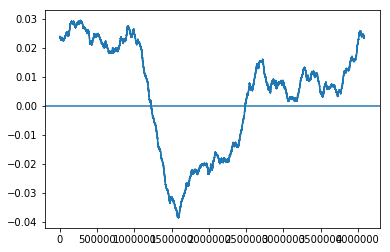

In [26]:
plt.plot(GC_val_eco)
plt.axhline(y = 0)

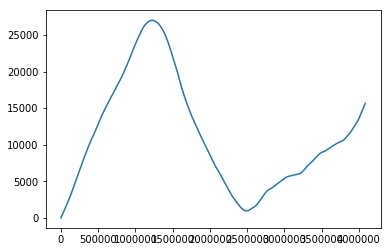

In [25]:
plt.plot(CGC_val_eco)

In [27]:
np_array_all_nc_pos = np.array(all_nc_pos)


In [28]:
 nc_gc_vals = CGC_val_eco[np_array_all_nc_pos]

In [29]:
len(GC_val_eco)

4086189

In [30]:
len(np_array_all_nc_pos)

919581

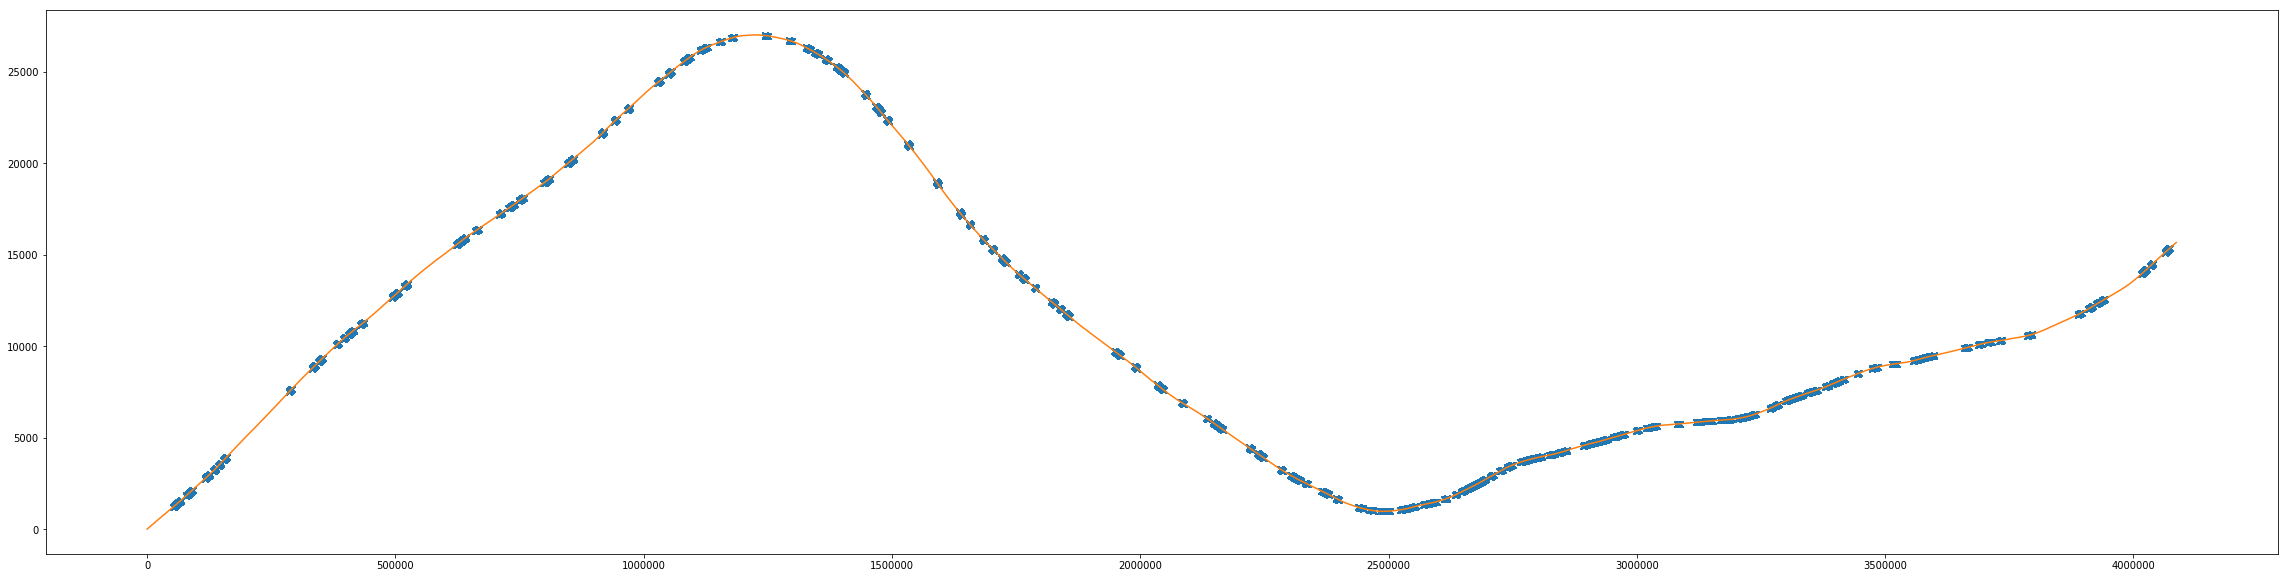

In [31]:
plt.figure(figsize = [40,10])

plt.plot(np_array_all_nc_pos,nc_gc_vals, 'x')
plt.plot(CGC_val_eco)

In [19]:
def avg_region_CGC(region_pos, CGC_curve):
    return np.average(CGC_curve[region_pos])

    

In [20]:
avg_region_CGC(list(range(1900000,2000000)),CGC_val_eco)

9683.575877002533

In [21]:
print(nc_gc_vals)

[ 1206.01422599  1206.03696688  1206.05970777 ... 15375.30550834
 15375.32941805 15375.35333065]


In [22]:
all_nc_pos[1:10]

[52393, 52394, 52395, 52396, 52397, 52398, 52399, 52400, 52401]

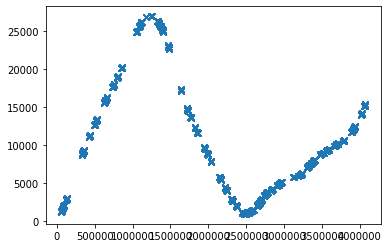

In [23]:

plt.plot(np_array_all_nc_pos,nc_gc_vals, 'x')


In [24]:
np_array_all_nc_pos

array([  52392,   52393,   52394, ..., 4074167, 4074168, 4074169])